In [3]:
%config Completer.use_jedi = False
# https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working

In [4]:
import pandas as pd
# import plotly.express as px
# import praw  # might use this too scrape some of the comments?
data_path = "../data/reddit_wsb.csv"

In [5]:
df = pd.read_csv(data_path, index_col="timestamp", parse_dates=True)
df = df.sort_index()
print(df.info()); df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25647 entries, 2021-01-28 09:08:16 to 2021-02-04 17:40:49
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      25647 non-null  object 
 1   score      25647 non-null  int64  
 2   id         25647 non-null  object 
 3   url        25647 non-null  object 
 4   comms_num  25647 non-null  int64  
 5   created    25647 non-null  float64
 6   body       12798 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB
None


,title,score,id,url,comms_num,created,body
timestamp,,,,,,,
2021-01-28 09:08:16,An autists journey. $150 to $68k in one month....,50,l6h58v,https://www.reddit.com/gallery/l6h58v,8,1.611818e+09,NaN
2021-01-28 09:08:17,You all have made Melvin live up to its name,70,l6h59b,https://i.redd.it/59sk10r7iyd61.png,7,1.611818e+09,NaN
2021-01-28 09:08:18,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...
2021-01-28 09:08:19,Highest SI % of Float End of Business Jan 27th...,26,l6h5am,https://www.reddit.com/r/wallstreetbets/commen...,22,1.611818e+09,Will Update Daily At Market Close\n\nTop 5 sec...
2021-01-28 09:08:21,Discord still down,0,l6h5bt,https://www.reddit.com/r/wallstreetbets/commen...,6,1.611818e+09,i can't see how to talk to to any anti bot mea...
...,...,...,...,...,...,...,...
2021-02-04 17:35:55,Democrats vow to legalize cannabis this year,0,lcah9m,https://www.reddit.com/r/wallstreetbets/commen...,7,1.612453e+09,Wake up retards. \nEnough talking about GME. \...
2021-02-04 17:36:29,Help out a fellow retard? MARGIN VS CASH quest...,0,lcahli,https://www.reddit.com/r/wallstreetbets/commen...,9,1.612453e+09,I have seen a lot about buying on margin... I ...
2021-02-04 17:36:48,SHOULD WSB GET A REP AT THE GME BOARD? WE NOW ...,2,lcahqv,https://www.reddit.com/r/wallstreetbets/commen...,7,1.612453e+09,It seems we have bought quite a lot of shares ...


In [6]:
# The id is unique
df.id.nunique()

25647

Better (drop some columns and treat as time series):

In [7]:
df_pd = pd.read_csv(data_path, 
                 index_col="timestamp", 
                 parse_dates=True, 
                 keep_default_na=False)
# df_pd = df_pd.assign(timestamp=pd.to_datetime(df_pd.timestamp))
df_pd = df_pd[["id", "title", "body"]]
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25647 entries, 2021-01-28 21:37:41 to 2021-02-04 07:54:27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      25647 non-null  object
 1   title   25647 non-null  object
 2   body    25647 non-null  object
dtypes: object(3)
memory usage: 801.5+ KB


In [8]:
# # In three cases I checked, the comms_num field is an ovestimate (by maybe 5%?) of the actual number of comments on the post.
# # Here are some of the most popular posts:
# df.iloc[(-df.comms_num).argsort()].head(10)

<AxesSubplot:xlabel='timestamp'>

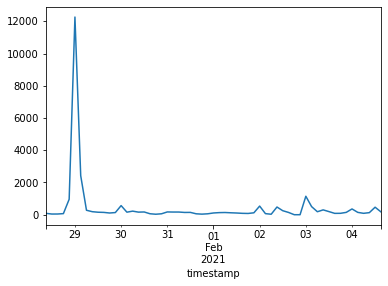

In [9]:
# activity measured by number of new posts
resampler = df["id"].resample("3h")
ddf = resampler.count()
ddf.plot()

<AxesSubplot:xlabel='timestamp'>

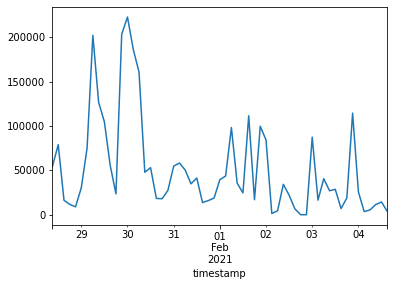

In [10]:
# activity measured by number of comments
resampler = df["comms_num"].resample("3h")
ddf = resampler.sum()
ddf.plot()

I want to train on the body of a number of posts from a given time window and watch how some indicators of sentiment change. I need to make sure that there are a reasonable number of posts in each window for this to matter. Spikes of high activity are fine.

In [11]:
# to actually divide by time range
bins = pd.cut(df.index, ddf.shape[0], 
              labels=list(range(ddf.shape[0])))
vcs = bins.value_counts()
print(vcs.describe())
# How many bins have less than 50 comments?
vcs[vcs<100]

count       59.000000
mean       434.694915
std       1656.618463
min          0.000000
25%         85.500000
50%        143.000000
75%        209.000000
max      12725.000000
dtype: float64


0     87
1     43
2     41
3     69
18    60
19    30
20    58
26    57
27    37
28    57
34    88
35    79
38    93
39     0
43     0
44     0
50    95
51    84
55    58
dtype: int64

In [10]:
# # check that the id is just a component of the reddit.com address
# prefix = "https://www.reddit.com/r/wallstreetbets/comments/"
# ddf = df.assign(url = df.url.str.extract(prefix + "(\w{6})/.*")); ddf